Upload libraries used for cleaning and wrangling.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import datetime

Import the dataset and define

In [2]:
df = pd.read_csv("netflix_titles.csv")

Get the statistics about the dataset

In [3]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Get an overview of the dataset and the variables and columns we are working with. To gain an in depth understanding of what it is about

In [4]:
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

Identify the missing values in the dataset

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Remove all the rows with missing values, so that we will only  work with a complete dataset, to ensure accuracy in our analysis and findings

In [6]:
df_cleaned = df.dropna()

Run the code again to ensure that there are no missing entries and values in the dataset

In [7]:
df_cleaned.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Drop all duplicate values in the dataset

In [8]:
df_cleaned = df.drop_duplicates()

Now that we have cleaned the data, we are going to identify what we want to analyse from the dataset

- Release year -  year with the most and least released movies
- Type (TV shows or movies) which are more
- Countries that have produced the most TV shows and movies
- Listed in, which type is the most or least

Starting of with the release year, we want to ensure values have the same format

In [9]:
df_cleaned['release_year'] = pd.to_numeric(df_cleaned['release_year'], errors='coerce')

Moving to the type of fim, we want to ensure there are no mispellings and only 2 options in the type column. As this dataset is only about TV Shows and Movies

In [10]:
different_types = df_cleaned['type'].unique()

In [12]:
for type_entry in different_types:
    print(type_entry)

Movie
TV Show


'Listed in' is not a clear term, so we change the colum name to 'genre' so its easier to understand that it is about the genre

In [13]:
df_cleaned.rename(columns={'listed_in': 'genre'}, inplace=True)
print(df_cleaned.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [14]:
genres = df_cleaned['genre'].nunique()

Identify how many genres we have in the datset

In [15]:
print(genres)

514


In [16]:
print(df_cleaned.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

Let us only work with movies and TV shows that have been released in the past 20 years. We are going to sort the data to only have Movies and TV shows from present to past 20 years

In [18]:
current_year = 2023
year_threshold = current_year - 20
df_cleaned = df_cleaned[df_cleaned['release_year'] >= year_threshold]
print(df_cleaned.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

#*1. The Year with the Most and Least Released Movies*

In [19]:
year_counts = df_cleaned[df_cleaned['type'] == 'Movie']['release_year'].value_counts()

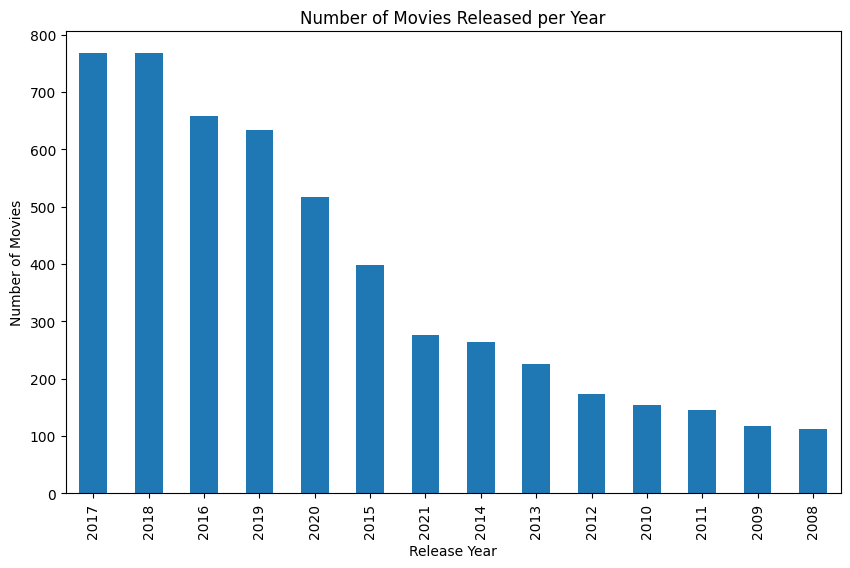

In [20]:
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year')
plt.show()

#2. Which type have been produced more, TV shows or Movies?

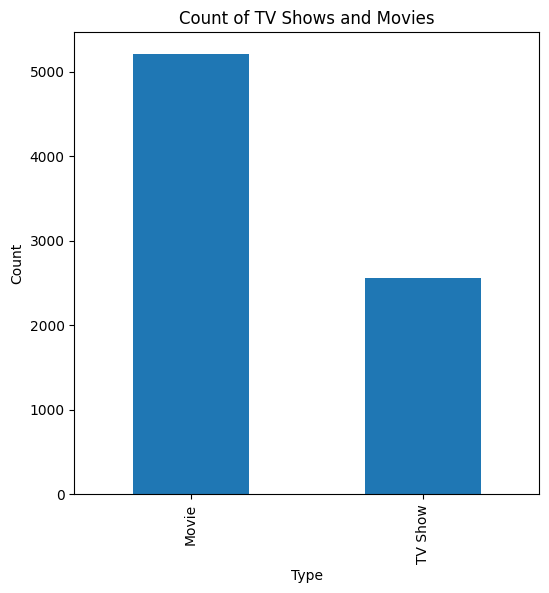

In [21]:
type_counts = df_cleaned['type'].value_counts()
plt.figure(figsize=(6, 6))
type_counts.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of TV Shows and Movies')
plt.show()

#3.Top 10 Countries that have produced the most movies

In [22]:
import seaborn as sns

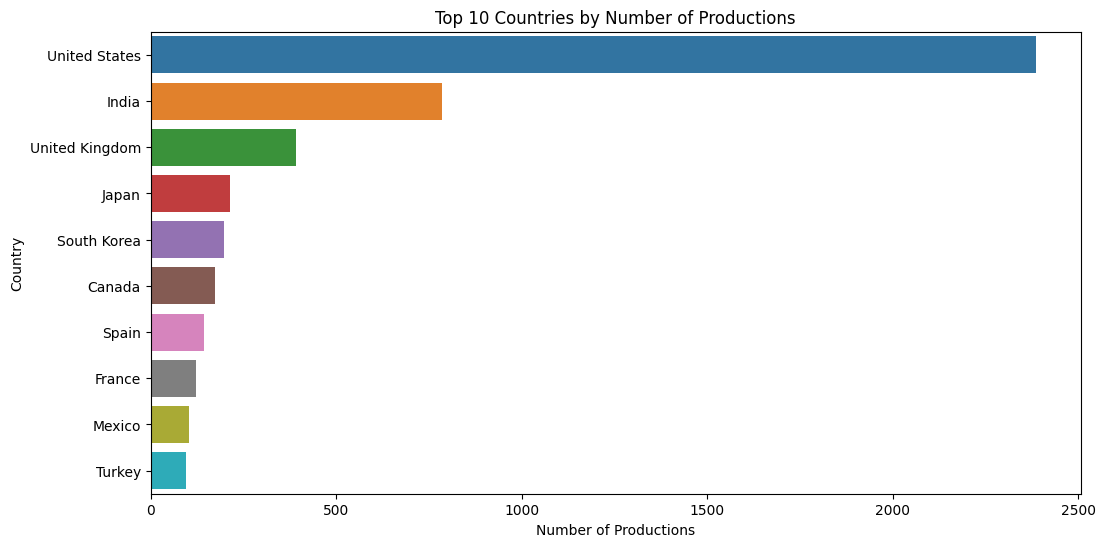

In [23]:
country_counts = df_cleaned['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.xlabel('Number of Productions')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Productions')
plt.show()

<ipython-input-29-2715e7e8631d>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


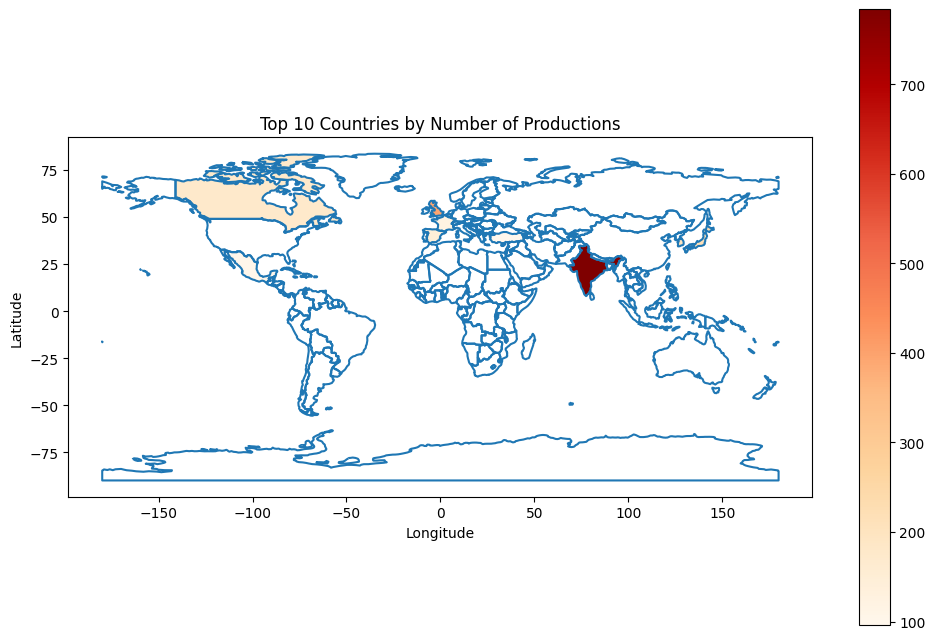

In [29]:
country_counts = df_cleaned['country'].value_counts().head(10)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(country_counts, left_on='name', right_index=True, how='left')
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.boundary.plot(ax=ax)
world.plot(column='country', cmap='OrRd', ax=ax, legend=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 10 Countries by Number of Productions')
plt.show()

# 4.Top 10 Most popular genres on Netflix

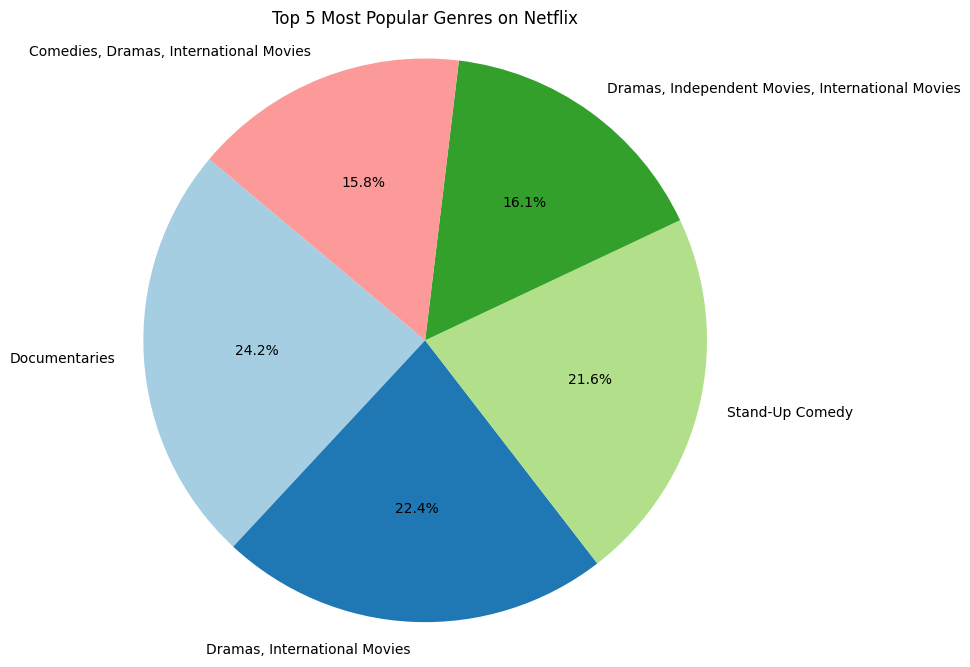

In [33]:
top_genres = df_cleaned['genre'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Most Popular Genres on Netflix')
plt.axis('equal')
plt.show()